# Patent analysis for EV

- set 1 is fuel cell
- set 2 is electric vehicle
- set 4 is internal combustion
- set 8 is hybrid

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
import nltk

In [3]:
# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [8]:
patent=pd.read_csv('patent_all_en_new.csv')

In [9]:
patent.shape

(68764, 34)

In [10]:
patent.sets.value_counts()

4     29749
2     16968
8     12825
1      5877
10     1867
12     1095
3       160
14      112
9        49
5        26
6        20
11       16
Name: sets, dtype: int64

In [11]:
patent.head()

,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,publn,...,citing_publn_date,citing_publn,citing_appln,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr
0,WO9105114W,47158713,1239277,2,1,1,US55592190A,1990-07-19,1993-02-18,WO9303532A1,...,2002-07-11,WO0199222A3,WO0119827W,45621927,24395918,30,LUZ ELECTRIC FUEL ISRAEL LTD.,LUZ ELECTRIC FUEL ISRAEL LTD.,ELECTRICAL ENERGY SYSTEM,An electrical energy system including an elect...
1,US55592190A,51797454,1239277,2,1,1,US55592190A,1990-07-19,1992-06-09,US5121044A,...,1993-05-04\n1994-03-09\n1994-09-20\n1995-07-18...,US5208526A\nEP0557287A4\nUS5349535A\nUS5434020...,US63645090A\nEP91915464A\nUS96399792A\nUS15296...,52393850\n16916549\n54353461\n48212422\n457802...,27071024\n1239277\n25508001\n22545199\n2636904...,30,"Luz Electric Fuel Israel, Ltd.","Luz Electric Fuel Israel, Ltd.",Electrical energy system,An electrical energy system including an elect...
2,EP96927918A,17205496,1341188,4,0,0,JP4059995A,1995-02-28,1998-08-12,EP0857862A1,...,2002-01-02\n2002-01-10\n2002-08-29\n2017-12-06,EP1167708A2\nDE10029978A1\nDE10105233A1\nEP220...,EP01115227A\nDE10029978A\nDE10105233A\nEP08842...,15814252\n12936842\n12970055\n57178895,7646156\n7646156\n7672964\n40580359,31,"SUMITOMO ELECTRIC INDUSTRIES, LTD.","SUMITOMO ELECTRIC INDUSTRIES, LTD.",PARTICULATE TRAP FOR A DIESEL ENGINE,An object is to provide a particulate trap for...
3,JP4059995A,27121457,1341188,4,1,0,JP4059995A,1995-02-28,1996-09-10,JPH08229330A,...,2010-09-27\n2011-01-27\n2013-05-02\n2014-03-18...,KR20100103462A\nJP2011502743A\nJP2013078764A\n...,KR20107010572A\nJP2010531202A\nJP2012279486A\n...,328440678\n332201837\n406999716\n378212937\n41...,40580359\n40580359\n40580359\n40580359\n405803...,31,SUMITOMO ELECTRIC IND LTD,SUMITOMO ELECTRIC IND LTD,PARTICULATE TRAP FOR DIESEL ENGINE,PURPOSE: To obtain a trap by which the leakage...
4,WO9602405W,30070806,1341188,4,0,0,JP4059995A,1995-02-28,1998-03-05,WO9809059A1,...,NaN,NaN,NaN,NaN,NaN,31,"Sumitomo Electric Industries, Ltd.","Sumitomo Electric Industries, Ltd.",PARTICULATE TRAP FOR A DIESEL ENGINE,A particulate trap for a diesel engine designe...


- appln                     The identifier of the application (with letter at the end, seems Google omits that)
- appln_id                  The (internal) patstat identifier of the application
- family_id                 The (internal) patstat identifier of the family that the application is a member of sets  - sets                      Indicate which sets (fuel-cell = 1, electric  vehicle = 2, both = 3) was matched
- direct                    Indicate whether this application was found directly (title/abstract/cpc/ipc) or      indirectly (family association)
- granted                   Whether or not the application was granted
- earliest_appln            Per family, the earliest application
- earliest_filing_date      The date of the family's earliest application
- publn                     Identifiers of publications associated with this application (*)
- publn_date                The dates of associated publications (*)
- publn_first_grant         Indicates for each publication if its the first one with granted status
- num_cpc_class             The number of CPC classes for this application
- cpc_class                 The CPC class symbols for this application
- num_ipc_class             The number of IPC classes for this application
- ipc_class                 The IPC class symbols for this application
- num_cited_publn           The number of forward citations (this applications refers to other publications)
- cited_publn_date          The dates of cited publications (**)
- cited_publn               The identifiers of cited publications (**)
- cited_appln               The identifiers of the applications  associated with cited publications (**)
- cited_appln_id            The (internal) patstat identifiers of the  applications associated with cited publications (**)
- cited_family_id           The (internal) patstat identifiers of the  family associated with cited publications (**)
- num_cited_family          The total number of distinct families  associated with cited publications (***)
- num_citing_publn          The number of backward citations (other  publications refer to this application)
- citing_publn_date         The dates of citing publications (**)
- citing_publn              The identifiers of citing publications (**)
- citing_appln              The identifiers of the applications  associated with citing publications (**)
- citing_appln_id           The (internal) patstat identifiers of the  applications associated with citing publications (**)
- citing_family_id          The (internal) patstat identifiers of the  family associated with citing publications (**)
- num_citing_family         The total number of distinct families  associated with citing publications (***)
- earliest_applt            The name of the (first) applicant of the  earliest publication of this application 
- current_applt             The name of the (first) applicant of the most recent publication of this application
- appln_title               The title of this application
>>
>> (*/**) These are one per line, in consistent order


>> (***) These seem to be the numbers that google uses to count citations. You can get this from the export if you aggregate all applications within a family and discard duplicates.


In [12]:
patent.shape

(68764, 34)

# 1) EDA

## 1.1)-Types of features in our dataset

In [13]:
patent.dtypes.value_counts()

object    23
int64     11
dtype: int64

In [14]:
# Checking all variables with their data-type
def _tbl_dtype(dataset):
    sum_dtype = pd.DataFrame(dataset.dtypes).sort_values(0).rename(columns = {0:'Data Type'})
    return sum_dtype

table_dtype = _tbl_dtype(patent)
table_dtype

,Data Type
num_cited_publn,int64
appln_id,int64
family_id,int64
sets,int64
direct,int64
granted,int64
num_cited_family,int64
num_citing_publn,int64
num_citing_family,int64
num_ipc_class,int64


## 1.2)-Checking missing values

In [15]:
def find_missing_values(df, columns):
    """
    Finds number of rows where certain columns are missing values.
    ::param_df:: = target dataframe
    ::param_columns:: = list of columns
    """
    missing_vals = {}
    print("Number of missing or NaN values for each column:")
    df_length = len(df)
    for column in columns:
        total_column_values = df[column].value_counts().sum()
        missing_vals[column] = df_length-total_column_values
        #missing_vals.append(str(column)+ " column has {} missing or NaN values.".format())
    return missing_vals

In [16]:
missing_values = find_missing_values(patent, columns=patent.columns)
missing_values

Number of missing or NaN values for each column:


{'appln': 0,
 'appln_id': 0,
 'family_id': 0,
 'sets': 0,
 'direct': 0,
 'granted': 0,
 'earliest_appln': 0,
 'earliest_filing_date': 0,
 'publn_date': 0,
 'publn': 0,
 'publn_first_grant': 0,
 'publn_claims': 0,
 'num_cpc_class': 0,
 'cpc_class': 6336,
 'num_ipc_class': 0,
 'ipc_class': 60,
 'num_cited_publn': 0,
 'cited_publn_date': 22319,
 'cited_publn': 22319,
 'cited_appln': 22319,
 'cited_appln_id': 22319,
 'cited_family_id': 22319,
 'num_cited_family': 0,
 'num_citing_publn': 0,
 'citing_publn_date': 24950,
 'citing_publn': 24950,
 'citing_appln': 24950,
 'citing_appln_id': 24950,
 'citing_family_id': 24950,
 'num_citing_family': 0,
 'earliest_applt': 508,
 'current_applt': 508,
 'appln_title': 0,
 'appln_abstr': 0}

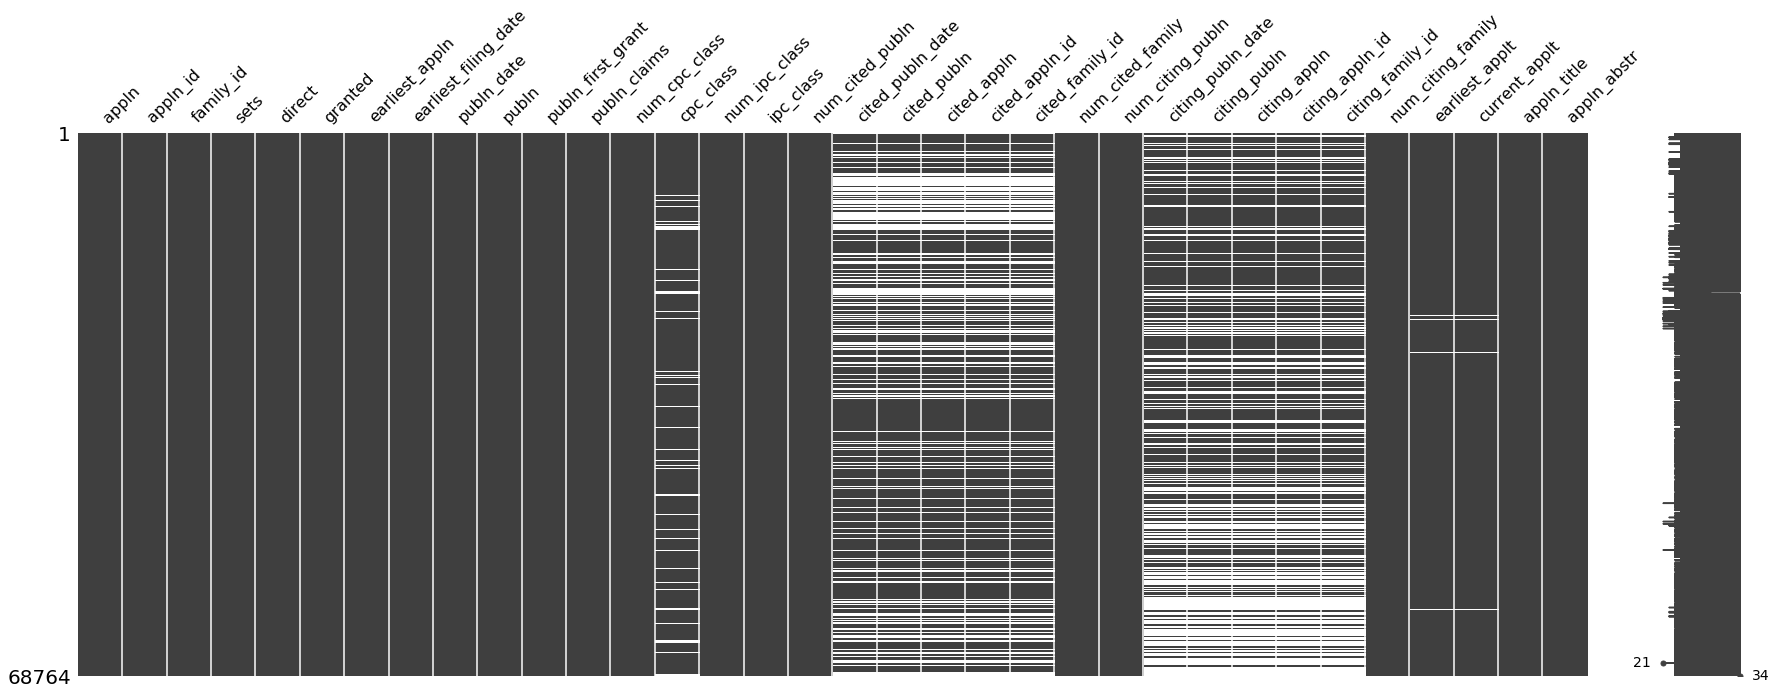

In [17]:
import missingno
missingno.matrix(patent, figsize = (30,10))

In [18]:
def summary_missing(dataset):
    n_miss = dataset.isnull().sum()
    n_obs = dataset.shape[0]
    n_miss_per = n_miss/n_obs*100
    n_miss_tbl = pd.concat([n_miss, n_miss_per], axis = 1).sort_values(1, ascending = False).round(1)
    n_miss_tbl = n_miss_tbl[n_miss_tbl[1] != 0]
    print('No. of fields: ', dataset.shape[0])
    print('No. of missing fields: ', n_miss_tbl.shape[0])
    n_miss_tbl = n_miss_tbl.rename(columns = {0:'No. of mising Value', 1:'%age of missing Value'})
    return n_miss_tbl

summary_missing(patent)

No. of fields:  68764
No. of missing fields:  14


,No. of mising Value,%age of missing Value
citing_publn,24950,36.3
citing_appln,24950,36.3
citing_publn_date,24950,36.3
citing_family_id,24950,36.3
citing_appln_id,24950,36.3
cited_appln_id,22319,32.5
cited_family_id,22319,32.5
cited_publn,22319,32.5
cited_publn_date,22319,32.5
cited_appln,22319,32.5


In [19]:
patent.sets.value_counts()

4     29749
2     16968
8     12825
1      5877
10     1867
12     1095
3       160
14      112
9        49
5        26
6        20
11       16
Name: sets, dtype: int64

- set 1 is fuel cell and contains 4411 values
- set 2 is electric vehicle and contains 16947 values
- set 4 is internal combustion and contains 1900 values
- set 8 is hybrid and contains 8048 values

# 2) Comparing groups

In [20]:
patent['granted'][:5]

0    1
1    1
2    0
3    0
4    0
Name: granted, dtype: int64

In [21]:
patent['granted'].value_counts()

1    52447
0    16317
Name: granted, dtype: int64

In [22]:
patent['current_applt'].value_counts()

TOYOTA MOTOR CORP                                           3602
Toyota Jidosha Kabushiki Kaisha                             2992
Robert Bosch GmbH                                           2508
Hyundai Motor Company                                       2228
HONDA MOTOR CO LTD                                          1903
NISSAN MOTOR CO LTD                                         1374
Ford Global Technologies, LLC                               1190
Nissan Motor Co., Ltd.                                       818
Honda Motor Co., Ltd.                                        782
Honda Giken Kogyo Kabushiki Kaisha                           611
DENSO CORP                                                   603
Peugeot Citroen Automobiles SA                               595
TOYOTA JIDOSHA KABUSHIKI KAISHA                              551
Toyota Motor Corporation                                     474
MITSUBISHI MOTORS CORP                                       457
HONDA MOTOR CO., LTD.    

In [23]:
# suppose we want to see how many patents are granted to Hyundai Motor Company 

patent[patent.current_applt == 'Hyundai Motor Company'].granted.value_counts()

1    1813
0     415
Name: granted, dtype: int64

In [24]:
# if we wanna see %age
patent[patent.current_applt == 'Hyundai Motor Company'].granted.value_counts(normalize=True)

1    0.813734
0    0.186266
Name: granted, dtype: float64

In [26]:
# Use groupby
patent.groupby('granted').current_applt.value_counts()

granted  current_applt                                                                                                                                                                    
0        Toyota Jidosha Kabushiki Kaisha                                                                                                                                                      1485
         Robert Bosch GmbH                                                                                                                                                                     891
         Hyundai Motor Company                                                                                                                                                                 415
         Nissan Motor Co., Ltd.                                                                                                                                                                324
         Ford Global Technologies

# 3)- Working with time series

Check which year has least and most patents granted <br>
earliest_filing_date= no. of patents' application

In [27]:
patent.earliest_filing_date.str.slice(0,4)

0        1990
1        1990
2        1995
3        1995
4        1995
5        1995
6        2000
7        2000
8        1998
9        1998
10       1993
11       2000
12       2000
13       2000
14       2000
15       2000
16       2000
17       2002
18       2002
19       1998
20       1998
21       2000
22       2002
23       2002
24       2002
25       1990
26       1994
27       2000
28       2000
29       2000
         ... 
68734    2017
68735    2017
68736    2017
68737    2017
68738    2017
68739    2017
68740    2016
68741    2016
68742    2016
68743    2016
68744    2005
68745    2005
68746    2005
68747    2014
68748    2017
68749    2016
68750    2014
68751    2014
68752    2014
68753    2016
68754    2016
68755    2016
68756    2016
68757    2016
68758    2016
68759    2017
68760    2017
68761    2017
68762    2015
68763    2017
Name: earliest_filing_date, Length: 68764, dtype: object

In [28]:
patent.earliest_filing_date.str.slice(0,4).value_counts()

2011    5737
2012    5242
2010    4659
2013    4247
2009    3754
2006    3498
2007    3444
2014    3420
2008    3259
2015    2687
2005    2641
2003    2431
2004    2310
2001    2267
2002    2219
2000    2211
1999    2003
1998    1726
1997    1581
2016    1568
1996    1483
1995    1285
1993    1205
1994    1154
1992    1008
1991     732
1990     631
2017     360
2018       2
Name: earliest_filing_date, dtype: int64

In [29]:
# alternative way
filling_date= patent.earliest_filing_date
patent['application_date']= pd.to_datetime(filling_date)

In [30]:
patent.dtypes

appln                           object
appln_id                         int64
family_id                        int64
sets                             int64
direct                           int64
granted                          int64
earliest_appln                  object
earliest_filing_date            object
publn_date                      object
publn                           object
publn_first_grant               object
publn_claims                    object
num_cpc_class                    int64
cpc_class                       object
num_ipc_class                    int64
ipc_class                       object
num_cited_publn                  int64
cited_publn_date                object
cited_publn                     object
cited_appln                     object
cited_appln_id                  object
cited_family_id                 object
num_cited_family                 int64
num_citing_publn                 int64
citing_publn_date               object
citing_publn             

application_date ..................       datetime64[ns]

In [31]:
patent['application_date'].dt.year

0        1990
1        1990
2        1995
3        1995
4        1995
5        1995
6        2000
7        2000
8        1998
9        1998
10       1993
11       2000
12       2000
13       2000
14       2000
15       2000
16       2000
17       2002
18       2002
19       1998
20       1998
21       2000
22       2002
23       2002
24       2002
25       1990
26       1994
27       2000
28       2000
29       2000
         ... 
68734    2017
68735    2017
68736    2017
68737    2017
68738    2017
68739    2017
68740    2016
68741    2016
68742    2016
68743    2016
68744    2005
68745    2005
68746    2005
68747    2014
68748    2017
68749    2016
68750    2014
68751    2014
68752    2014
68753    2016
68754    2016
68755    2016
68756    2016
68757    2016
68758    2016
68759    2017
68760    2017
68761    2017
68762    2015
68763    2017
Name: application_date, Length: 68764, dtype: int64

In [32]:
# checking for highest patent in a year
patent['application_date'].dt.year.value_counts()

2011    5737
2012    5242
2010    4659
2013    4247
2009    3754
2006    3498
2007    3444
2014    3420
2008    3259
2015    2687
2005    2641
2003    2431
2004    2310
2001    2267
2002    2219
2000    2211
1999    2003
1998    1726
1997    1581
2016    1568
1996    1483
1995    1285
1993    1205
1994    1154
1992    1008
1991     732
1990     631
2017     360
2018       2
Name: application_date, dtype: int64

In [33]:
# checking for least patents per year
patent['application_date'].dt.year.value_counts().sort_values()

2018       2
2017     360
1990     631
1991     732
1992    1008
1994    1154
1993    1205
1995    1285
1996    1483
2016    1568
1997    1581
1998    1726
1999    2003
2000    2211
2002    2219
2001    2267
2004    2310
2003    2431
2005    2641
2015    2687
2008    3259
2014    3420
2007    3444
2006    3498
2009    3754
2013    4247
2010    4659
2012    5242
2011    5737
Name: application_date, dtype: int64

In [34]:
patent['application_date'].dt.year.value_counts(ascending= True)

2018       2
2017     360
1990     631
1991     732
1992    1008
1994    1154
1993    1205
1995    1285
1996    1483
2016    1568
1997    1581
1998    1726
1999    2003
2000    2211
2002    2219
2001    2267
2004    2310
2003    2431
2005    2641
2015    2687
2008    3259
2014    3420
2007    3444
2006    3498
2009    3754
2013    4247
2010    4659
2012    5242
2011    5737
Name: application_date, dtype: int64

In [35]:
#We can even pick least patent year
patent.application_date.dt.year.value_counts().sort_values().index[0]

2018

In [36]:
# For highest year
patent.application_date.dt.year.value_counts().index[0]

2011

## 3.1)- Distribution of the patent applications over application years

use earliest_filing_date and granted variables
figure 3 in paper

In [37]:
patent.head()

,appln,appln_id,family_id,sets,direct,granted,earliest_appln,earliest_filing_date,publn_date,publn,...,citing_publn,citing_appln,citing_appln_id,citing_family_id,num_citing_family,earliest_applt,current_applt,appln_title,appln_abstr,application_date
0,WO9105114W,47158713,1239277,2,1,1,US55592190A,1990-07-19,1993-02-18,WO9303532A1,...,WO0199222A3,WO0119827W,45621927,24395918,30,LUZ ELECTRIC FUEL ISRAEL LTD.,LUZ ELECTRIC FUEL ISRAEL LTD.,ELECTRICAL ENERGY SYSTEM,An electrical energy system including an elect...,1990-07-19
1,US55592190A,51797454,1239277,2,1,1,US55592190A,1990-07-19,1992-06-09,US5121044A,...,US5208526A\nEP0557287A4\nUS5349535A\nUS5434020...,US63645090A\nEP91915464A\nUS96399792A\nUS15296...,52393850\n16916549\n54353461\n48212422\n457802...,27071024\n1239277\n25508001\n22545199\n2636904...,30,"Luz Electric Fuel Israel, Ltd.","Luz Electric Fuel Israel, Ltd.",Electrical energy system,An electrical energy system including an elect...,1990-07-19
2,EP96927918A,17205496,1341188,4,0,0,JP4059995A,1995-02-28,1998-08-12,EP0857862A1,...,EP1167708A2\nDE10029978A1\nDE10105233A1\nEP220...,EP01115227A\nDE10029978A\nDE10105233A\nEP08842...,15814252\n12936842\n12970055\n57178895,7646156\n7646156\n7672964\n40580359,31,"SUMITOMO ELECTRIC INDUSTRIES, LTD.","SUMITOMO ELECTRIC INDUSTRIES, LTD.",PARTICULATE TRAP FOR A DIESEL ENGINE,An object is to provide a particulate trap for...,1995-02-28
3,JP4059995A,27121457,1341188,4,1,0,JP4059995A,1995-02-28,1996-09-10,JPH08229330A,...,KR20100103462A\nJP2011502743A\nJP2013078764A\n...,KR20107010572A\nJP2010531202A\nJP2012279486A\n...,328440678\n332201837\n406999716\n378212937\n41...,40580359\n40580359\n40580359\n40580359\n405803...,31,SUMITOMO ELECTRIC IND LTD,SUMITOMO ELECTRIC IND LTD,PARTICULATE TRAP FOR DIESEL ENGINE,PURPOSE: To obtain a trap by which the leakage...,1995-02-28
4,WO9602405W,30070806,1341188,4,0,0,JP4059995A,1995-02-28,1998-03-05,WO9809059A1,...,NaN,NaN,NaN,NaN,31,"Sumitomo Electric Industries, Ltd.","Sumitomo Electric Industries, Ltd.",PARTICULATE TRAP FOR A DIESEL ENGINE,A particulate trap for a diesel engine designe...,1995-02-28


In [38]:
patent['granted'].value_counts()

1    52447
0    16317
Name: granted, dtype: int64

In [39]:
patent['granted'].value_counts(normalize=True)

1    0.76271
0    0.23729
Name: granted, dtype: float64

In [40]:
patent.granted.mean()

0.7627101390262346

In [41]:
patent.groupby(patent.application_date.dt.year).granted.count()

application_date
1990     631
1991     732
1992    1008
1993    1205
1994    1154
1995    1285
1996    1483
1997    1581
1998    1726
1999    2003
2000    2211
2001    2267
2002    2219
2003    2431
2004    2310
2005    2641
2006    3498
2007    3444
2008    3259
2009    3754
2010    4659
2011    5737
2012    5242
2013    4247
2014    3420
2015    2687
2016    1568
2017     360
2018       2
Name: granted, dtype: int64

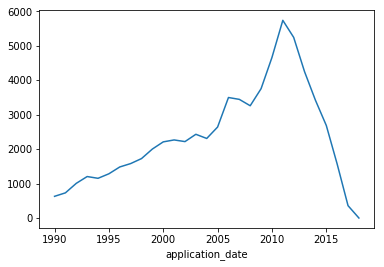

In [42]:
patent.groupby(patent.application_date.dt.year).granted.count().plot()

In [43]:
patent.groupby(patent.application_date.dt.year).granted.count().sort_values()

application_date
2018       2
2017     360
1990     631
1991     732
1992    1008
1994    1154
1993    1205
1995    1285
1996    1483
2016    1568
1997    1581
1998    1726
1999    2003
2000    2211
2002    2219
2001    2267
2004    2310
2003    2431
2005    2641
2015    2687
2008    3259
2014    3420
2007    3444
2006    3498
2009    3754
2013    4247
2010    4659
2012    5242
2011    5737
Name: granted, dtype: int64

**The steep drop in patent applications in 2013 is due to the patent ﬁlling process at the USPTO, which involves a signiﬁcant time lag between the ﬁling and disclosure or registration of applications, ranging from several months to over two years.**

So work uptill fig 3 is done

# 3.2) Top assignees of the vehicle related patents.


In [44]:
patent['current_applt'].value_counts().head()

TOYOTA MOTOR CORP                  3602
Toyota Jidosha Kabushiki Kaisha    2992
Robert Bosch GmbH                  2508
Hyundai Motor Company              2228
HONDA MOTOR CO LTD                 1903
Name: current_applt, dtype: int64

In [45]:
assigne_data=patent['current_applt'].value_counts()

In [46]:
df_assigne= pd.DataFrame(data=assigne_data)

In [47]:
df_assigne.head()

,current_applt
TOYOTA MOTOR CORP,3602
Toyota Jidosha Kabushiki Kaisha,2992
Robert Bosch GmbH,2508
Hyundai Motor Company,2228
HONDA MOTOR CO LTD,1903


In [48]:
df_assigne['Commulative']=patent['current_applt'].value_counts(normalize=True)

In [49]:
df_assigne.head()

,current_applt,Commulative
TOYOTA MOTOR CORP,3602,0.052772
Toyota Jidosha Kabushiki Kaisha,2992,0.043835
Robert Bosch GmbH,2508,0.036744
Hyundai Motor Company,2228,0.032642
HONDA MOTOR CO LTD,1903,0.027880


In [50]:
df_assigne=df_assigne.rename(index=str, columns={" ": "Assigne", "current_applt": "# of patents"})

In [57]:
df_assigne.head(30)

,# of patents,Commulative
TOYOTA MOTOR CORP,3602,0.052772
Toyota Jidosha Kabushiki Kaisha,2992,0.043835
Robert Bosch GmbH,2508,0.036744
Hyundai Motor Company,2228,0.032642
HONDA MOTOR CO LTD,1903,0.027880
NISSAN MOTOR CO LTD,1374,0.020130
"Ford Global Technologies, LLC",1190,0.017434
"Nissan Motor Co., Ltd.",818,0.011984
"Honda Motor Co., Ltd.",782,0.011457
Honda Giken Kogyo Kabushiki Kaisha,611,0.008952


**Problem of duplicate assignee**

# 4 Text Mining

## 4.1 )-Checking data for text analysis

In [52]:
patent_abst=patent['appln_abstr']

In [53]:
chars = list(set(patent_abst)) 
data_size, vocab_size = len(patent_abst), len(chars)
print ("Patent data has chars", data_size)
print ("Patent data has unique chars", vocab_size)

Patent data has chars 68764
Patent data has unique chars 60325


**still there are alot of unique letters. Seems like patents do use key words alot**

In [54]:
import warnings
warnings.filterwarnings(action='ignore', category=UserWarning, module='gensim')

import nltk
import gensim

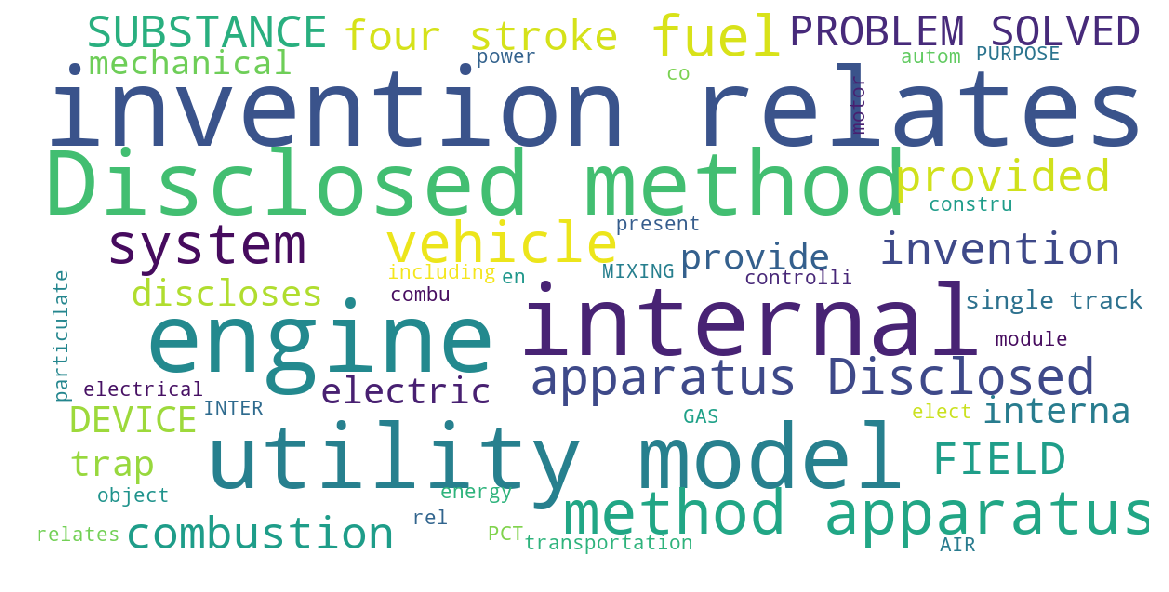

In [56]:
from wordcloud import WordCloud, STOPWORDS
stopwords=set(STOPWORDS)

def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 50 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()
Mywordcloud(patent['appln_abstr'].dropna())